In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import os
os.chdir('../')
from function import make_data

In [3]:
df_2 = pd.read_csv('./pn500.csv')

In [4]:
dx = np.diff(df_2['V2'], axis=0)

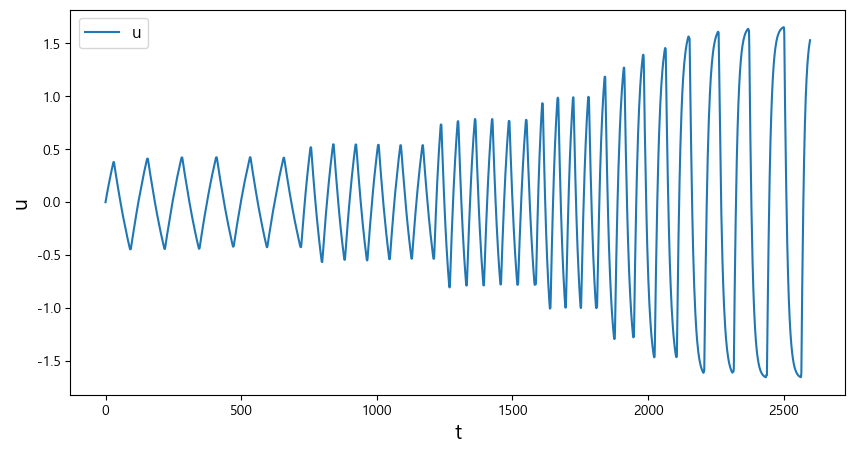

In [5]:
plt.figure(figsize = (10, 5))
plt.plot(df_2['V2'], label = 'u')
plt.ylabel('u', fontsize = 15)
plt.xlabel('t', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

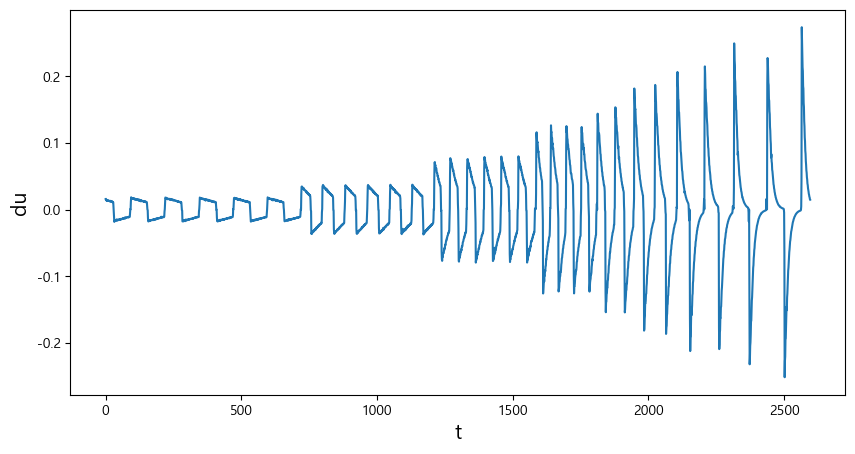

In [6]:
plt.figure(figsize = (10, 5))
plt.plot(dx)
plt.ylabel('du', fontsize = 15)
plt.xlabel('t', fontsize = 15)
plt.show()

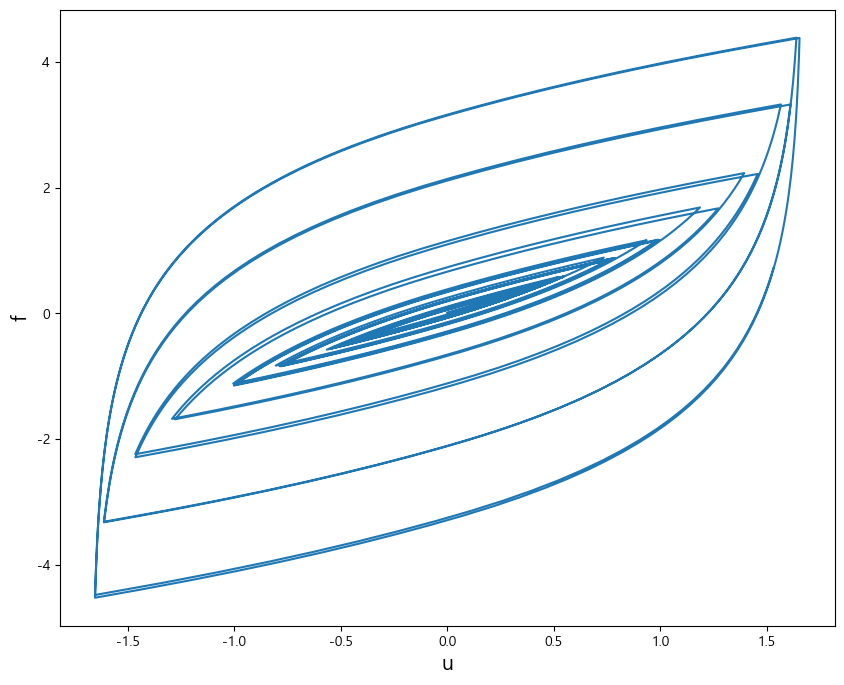

In [7]:
plt.figure(figsize = (10,8))
plt.plot(df_2['V2'], df_2['V1'])
plt.xlabel('u', fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.show()

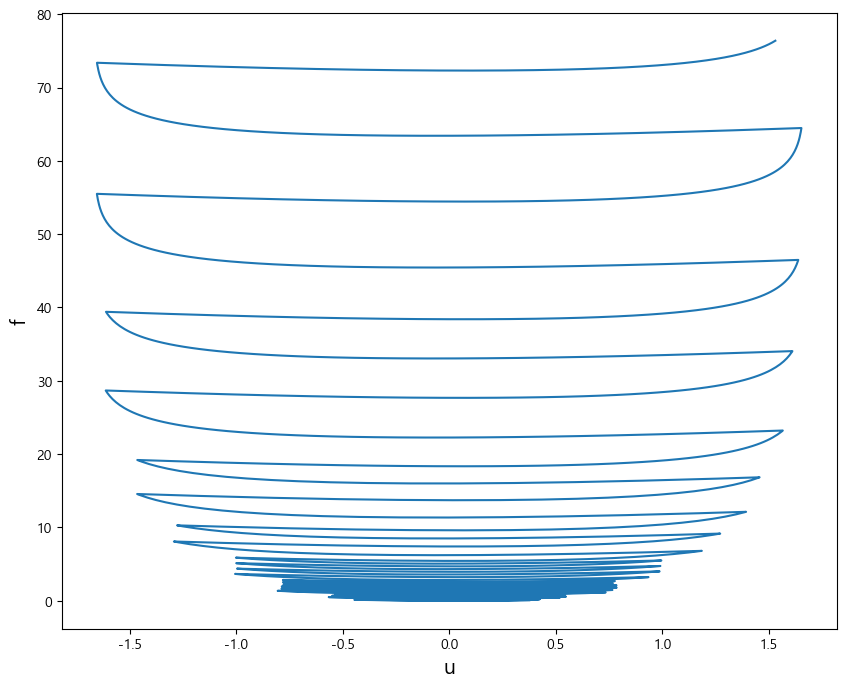

In [8]:
plt.figure(figsize = (10,8))
plt.plot(df_2['V2'], df_2['V3'])
plt.xlabel('u', fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.show()

In [9]:
def eval_inc(z, dx, gamma, beta, alpha, n):
    psi = gamma + beta * np.sign(dx * z)
    dz = dx * (1-abs(z)**n * psi)
    df = (1-alpha) * dx + alpha * dz
    de = z * dx

    return dz, df, de

In [10]:
result_matrix = np.zeros((len(df_2), 4)) # z, x, f, e

In [11]:
for i in range(len(result_matrix)-1):
    res = eval_inc(result_matrix[i,1], dx[i], 0.1, 0.5, 0.001, 1)

    result_matrix[i+1,0] = result_matrix[i,0] + dx[i] # x
    result_matrix[i+1,1] = result_matrix[i,1] + res[0] # z
    result_matrix[i+1,2] = result_matrix[i,2] + res[1] # f
    result_matrix[i+1,3] = result_matrix[i,3] + res[2] # e


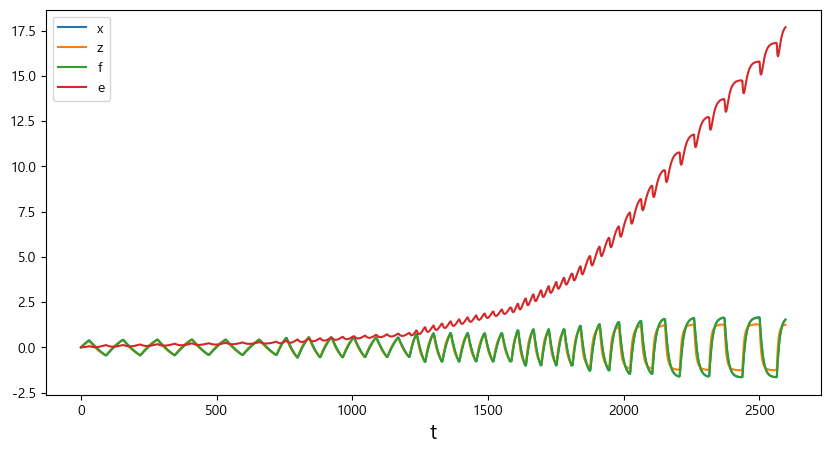

In [12]:
plt.figure(figsize = (10, 5))
plt.plot(result_matrix[:,0], label = 'x')
plt.plot(result_matrix[:,1], label = 'z')
plt.plot(result_matrix[:,2], label = 'f')
plt.plot(result_matrix[:,3], label = 'e')
plt.legend()
plt.xlabel('t', fontsize = 15)
plt.show()

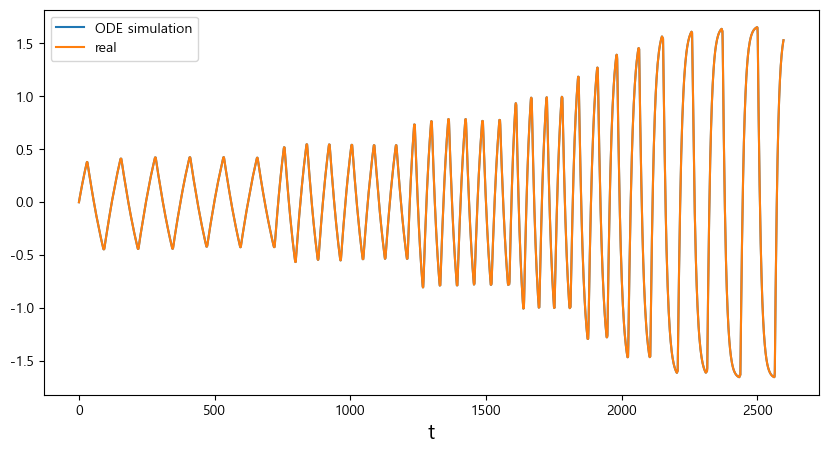

In [13]:
plt.figure(figsize = (10, 5))
plt.plot(result_matrix[:,2], label = 'ODE simulation')
df_2.iloc[:,2].plot(label = 'real')
plt.legend()
plt.xlabel('t', fontsize = 15)
plt.show()

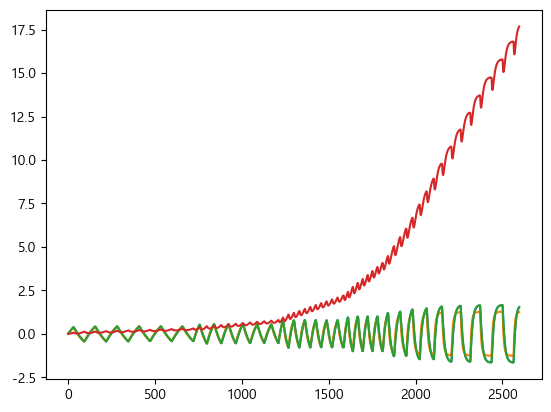

In [14]:
plt.plot(result_matrix[:,])

-----

In [15]:
df = make_data(dt = 1, total_time = 10000)

In [59]:
from sklearn.preprocessing import StandardScaler

In [18]:
df.drop(['time'], axis = 1, inplace = True)

In [60]:
sc = StandardScaler()

In [66]:
train_df = sc.fit_transform(df.iloc[:6000,:])
test_df = sc.transform(df.iloc[6000:,:])

In [74]:
train_dx_u = np.diff(train_df[:,0], axis=0)
test_dx_u = np.diff(test_df[:,0], axis=0)

In [75]:
train_dx_f = np.diff(train_df[:,1], axis=0)
test_dx_f = np.diff(test_df[:,1], axis=0)

In [38]:
from pyswarm import pso

In [73]:
def objective_function(params, dx, target_df):
    gamma, beta, alpha, n = params
    df_list = []
    for i in range(len(target_df)):
        _, df, _ = eval_inc(0, dx, gamma, beta, alpha, n)
        df_list.append(df)
    total_error = np.sum(np.abs(np.array(df_list) - np.array(target_df)))
    return total_error

In [81]:
lb = [-10, -10, -10, -10] 
ub = [10, 10, 10, 10]

args = (train_dx_u, train_dx_f)

In [82]:
optimized_params, _ = pso(objective_function, lb, ub, maxiter=50, args = args, debug = True, minstep=1e-7)

No constraints given.


C:\Users\user\AppData\Local\Temp\ipykernel_15472\3115354175.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  dz = dx * (1-abs(z)**n * psi)


Best after iteration 1: [ 7.60535107  0.1399445  -7.8955509   9.11800715] 10897.222683350868
New best for swarm at iteration 2: [10.         -2.160091    7.87538781  0.57942679] 10897.222683349322
Stopping search: Swarm best objective change less than 1e-08


In [83]:
optimized_params

array([10.        , -2.160091  ,  7.87538781,  0.57942679])

In [84]:
gamma, beta, alpha, n = optimized_params

In [155]:
result_matrix_2 = np.zeros((len(df), 4)) # z, x, f, e

In [97]:
open_all_du = np.diff(np.concatenate([train_df[:,0], test_df[:,0]], axis = 0))

In [156]:
for i in range(len(result_matrix_2)-1):
    res = eval_inc(result_matrix_2[i,1], open_all_du[i], gamma, beta, alpha, 5)

    result_matrix_2[i+1,0] = result_matrix_2[i,0] + open_all_du[i] # x
    result_matrix_2[i+1,1] = result_matrix_2[i,1] + res[0] # z
    result_matrix_2[i+1,2] = result_matrix_2[i,2] + res[1] # f
    result_matrix_2[i+1,3] = result_matrix_2[i,3] + res[2] # e


C:\Users\user\AppData\Local\Temp\ipykernel_15472\3115354175.py:3: RuntimeWarning: overflow encountered in double_scalars
  dz = dx * (1-abs(z)**n * psi)
C:\Users\user\AppData\Local\Temp\ipykernel_15472\3684635873.py:5: RuntimeWarning: invalid value encountered in double_scalars
  result_matrix_2[i+1,1] = result_matrix_2[i,1] + res[0] # z
C:\Users\user\AppData\Local\Temp\ipykernel_15472\3684635873.py:6: RuntimeWarning: invalid value encountered in double_scalars
  result_matrix_2[i+1,2] = result_matrix_2[i,2] + res[1] # f


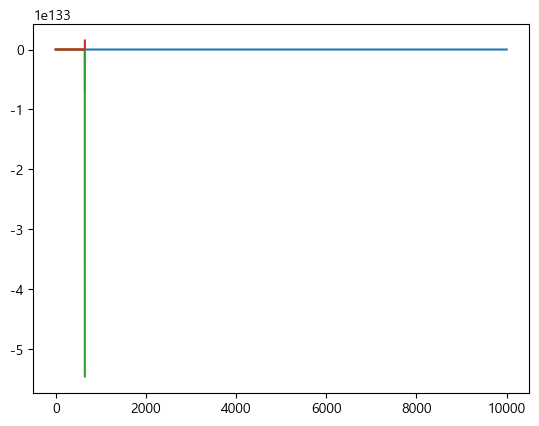

In [157]:
plt.plot(result_matrix_2)

(-2.0, 0.0)

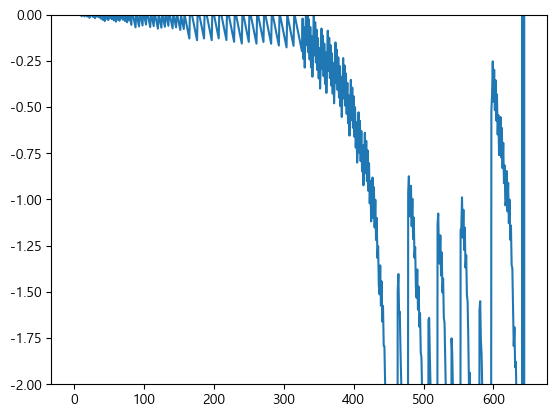

In [176]:
plt.plot(result_matrix_2[:,2])
plt.ylim(-2,0)

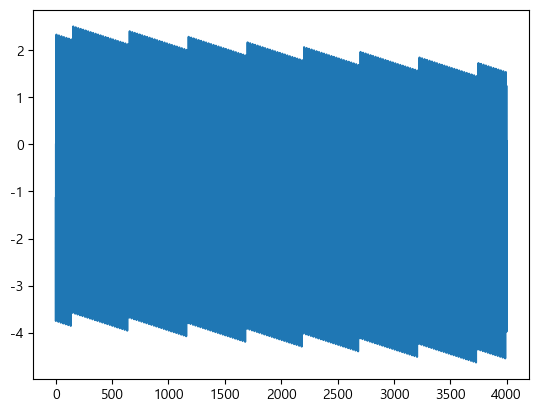

In [150]:
plt.plot(test_df[:,1])

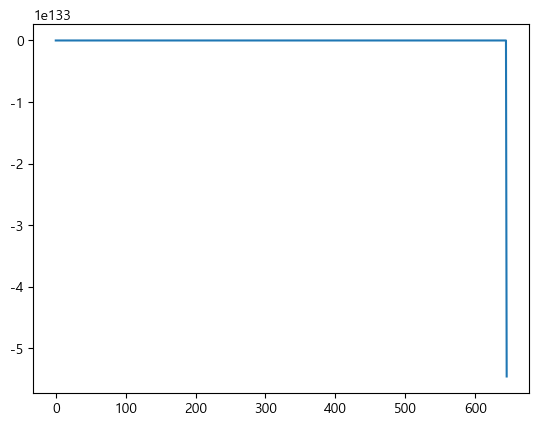

In [152]:
plt.plot(result_matrix_2[:,2])

---------
-----------


In [102]:
close_df = make_data(dt = 0.01, total_time = 100)

In [103]:
close_df

,u,time,f
0,0.000000e+00,0.00,0.000000
1,6.279052e-02,0.01,0.152729
2,1.253332e-01,0.02,0.272857
3,1.873813e-01,0.03,0.369560
4,2.486899e-01,0.04,0.449713
...,...,...,...
9996,-2.486899e-01,99.96,0.299485
9997,-1.873813e-01,99.97,0.338637
9998,-1.253332e-01,99.98,0.375329
9999,-6.279052e-02,99.99,0.410222


In [111]:
close_df.drop(['time'], axis=1, inplace=True)

In [112]:
sc_2 = StandardScaler()

In [113]:
close_df_train = sc_2.fit_transform(close_df.iloc[:6000,:])
close_df_test = sc_2.transform(close_df.iloc[6000:,:])

In [117]:
close_df_train_dx_u = np.diff(close_df_train[:,0], axis=0)
close_df_test_dx_u = np.diff(close_df_test[:,0], axis=0)

close_df_train_dx_f = np.diff(close_df_train[:,1], axis=0)
close_df_test_dx_f = np.diff(close_df_test[:,1], axis=0)

In [118]:
args_2 = (close_df_train_dx_u, close_df_train_dx_f)

In [119]:
def objective_function_2(params, dx, target_df):
    gamma, beta, alpha, z, n = params
    df_list = []
    for i in range(len(target_df)):
        _, df, _ = eval_inc(z, dx, gamma, beta, alpha, n)
        df_list.append(df)
    total_error = np.sum(np.abs(np.array(df_list) - np.array(target_df)))
    return total_error

In [120]:
lb_2 = [-10, -10, -10, -10, -10]
ub_2 = [10, 10, 10, 10, 10]

In [121]:
optimized_params_2, _ = pso(objective_function_2, lb_2, ub_2, maxiter=100, args = args_2, debug=True, swarmsize=10, phip = 0.7, phig = 0.7, minstep=1e-10)

No constraints given.
New best for swarm at iteration 1: [-9.19490392 -7.72719426 -5.28931357  2.45905718 -5.90281497] 1218708.2074403919
Best after iteration 1: [-9.19490392 -7.72719426 -5.28931357  2.45905718 -5.90281497] 1218708.2074403919
Best after iteration 2: [-9.19490392 -7.72719426 -5.28931357  2.45905718 -5.90281497] 1218708.2074403919
Best after iteration 3: [-9.19490392 -7.72719426 -5.28931357  2.45905718 -5.90281497] 1218708.2074403919
New best for swarm at iteration 4: [-10.          -8.48967612  -8.34757031   2.78034801  -7.56906805] 1214660.0141197238
Best after iteration 4: [-10.          -8.48967612  -8.34757031   2.78034801  -7.56906805] 1214660.0141197238
New best for swarm at iteration 5: [-10.         -10.          -5.23773139   3.08098537  -5.97297575] 1204183.0877125182
Best after iteration 5: [-10.         -10.          -5.23773139   3.08098537  -5.97297575] 1204183.0877125182
New best for swarm at iteration 6: [-10.          -8.39536679  -1.98338196   2.236095

In [122]:
optimized_params_2

array([-9.9999627 ,  0.03663811, -4.58606472,  3.60126161, -4.07718489])

In [123]:
gamma_close, beta_close, alpha_close, close_z, close_n = optimized_params_2

In [135]:
result_matrix_3 = np.zeros((len(close_df), 4)) # z, x, f, e

In [137]:
close_all_du = np.diff(np.concatenate([close_df_train, close_df_test], axis = 0)
)

In [138]:
for i in range(len(result_matrix_3)-1):
    res = eval_inc(close_z, close_all_du[i], gamma_close, beta_close, alpha_close, close_n)

    result_matrix_3[i+1,0] = result_matrix_3[i,0] + close_all_du[i] # x
    result_matrix_3[i+1,1] = result_matrix_3[i,1] + res[0] # z
    result_matrix_3[i+1,2] = result_matrix_3[i,2] + res[1] # f
    result_matrix_3[i+1,3] = result_matrix_3[i,3] + res[2] # e

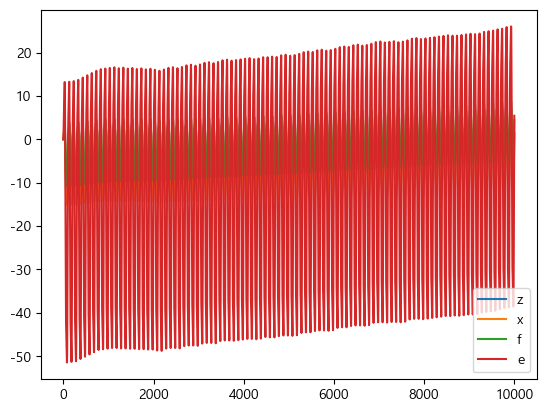

In [139]:
plt.plot(result_matrix_3)
plt.legend(['z', 'x', 'f', 'e'])
plt.show()

In [178]:
close_df

,u,f
0,0.000000e+00,0.000000
1,6.279052e-02,0.152729
2,1.253332e-01,0.272857
3,1.873813e-01,0.369560
4,2.486899e-01,0.449713
...,...,...
9996,-2.486899e-01,0.299485
9997,-1.873813e-01,0.338637
9998,-1.253332e-01,0.375329
9999,-6.279052e-02,0.410222


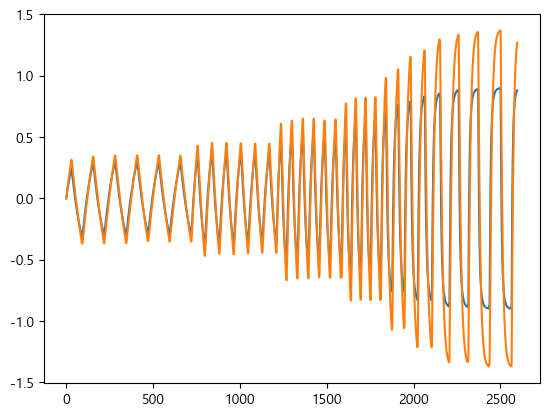

In [192]:
plt.plot(sc_2.inverse_transform(result_matrix[:,1:3]))

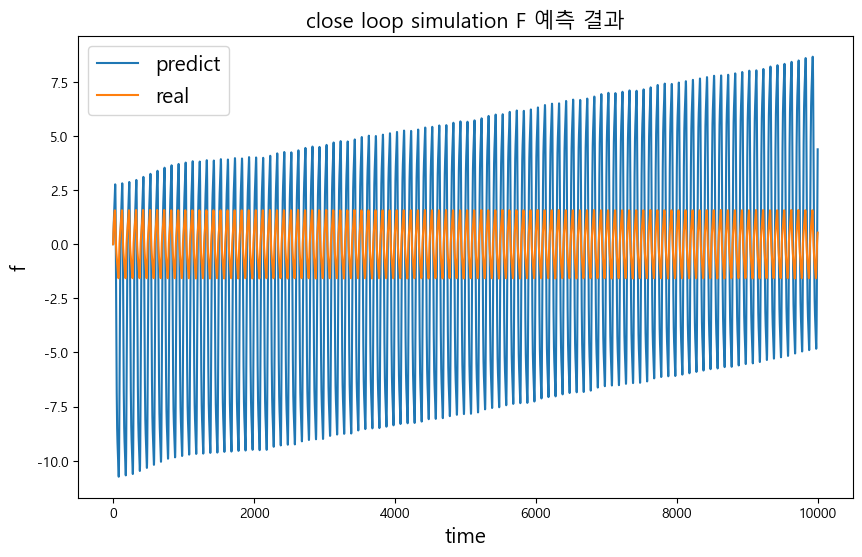

In [183]:
plt.figure(figsize=(10,6))
plt.plot(range(len(df)),result_matrix_3[:,2])
plt.plot(range(len(df)), np.concatenate([close_df_train[:,1], close_df_test[:,1]], axis = 0))
plt.title('close loop simulation F 예측 결과', fontsize = 15)
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

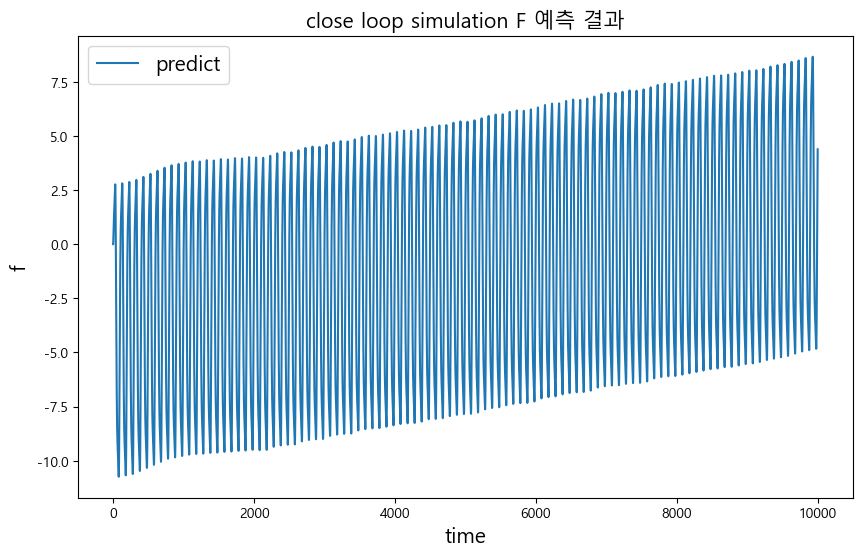

In [141]:
plt.figure(figsize=(10,6))
plt.plot(range(len(df)),result_matrix_3[:,2])
plt.title('close loop simulation F 예측 결과', fontsize = 15)
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

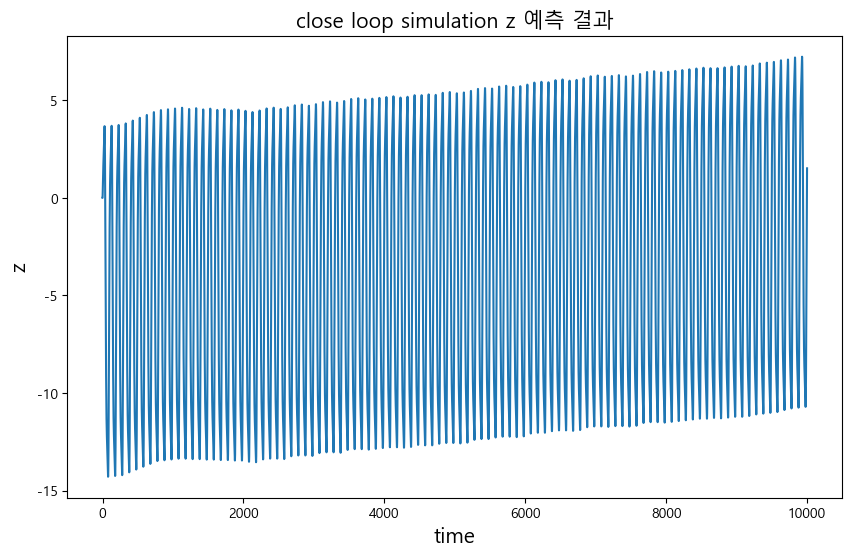

In [142]:
plt.figure(figsize=(10,6))
plt.plot(range(len(df)),result_matrix_3[:,0])
plt.title('close loop simulation z 예측 결과', fontsize = 15)
plt.ylabel('z', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

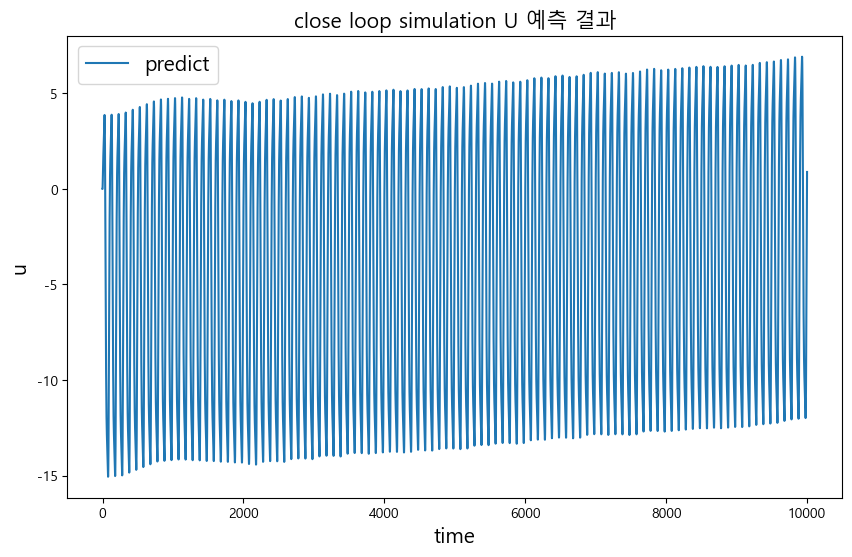

In [143]:
plt.figure(figsize=(10,6))
plt.plot(range(len(df)),result_matrix_3[:,1])
plt.title('close loop simulation U 예측 결과', fontsize = 15)
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('u', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

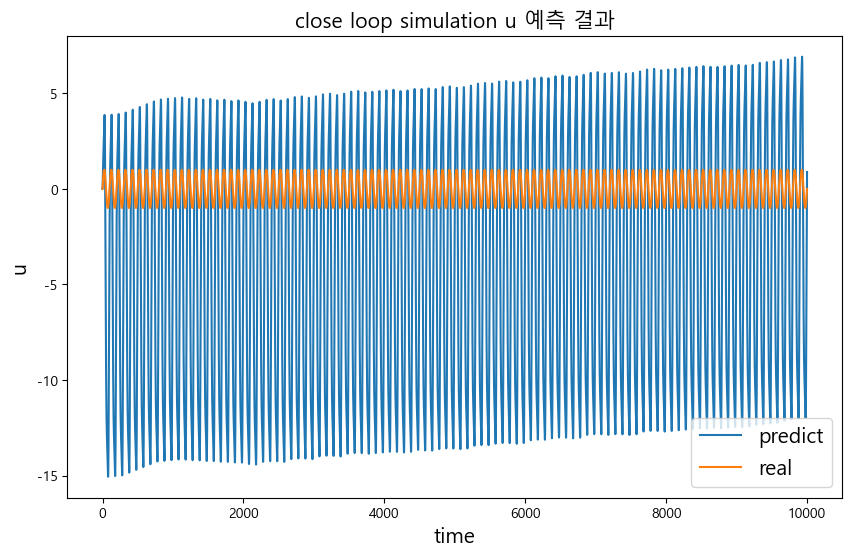

In [144]:
plt.figure(figsize=(10,6))
plt.plot(range(len(df)),result_matrix_3[:,1])
plt.plot(range(len(df)), close_df.u)
plt.title('close loop simulation u 예측 결과', fontsize = 15)
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('u', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

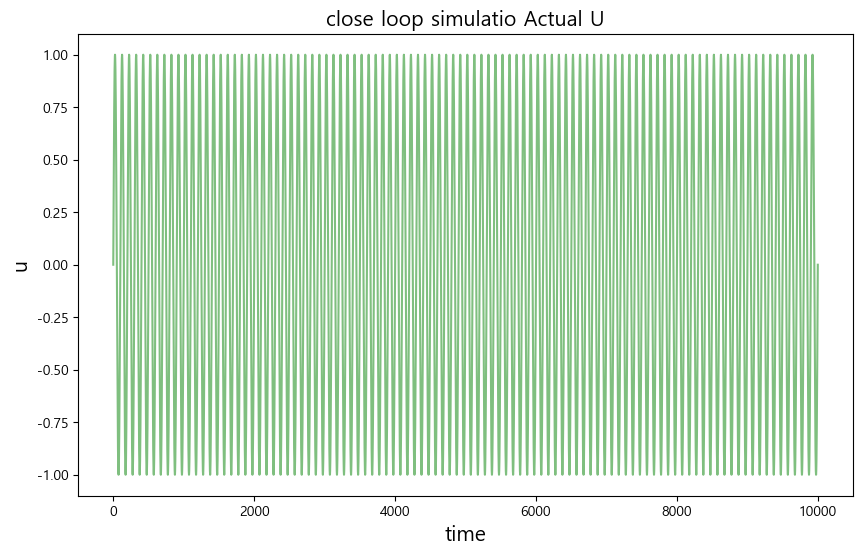

In [145]:
plt.figure(figsize=(10,6))
plt.plot(close_df.u, color = 'g', alpha = 0.5)
plt.ylabel('u', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.title('close loop simulatio Actual U', fontsize = 15)
plt.show()

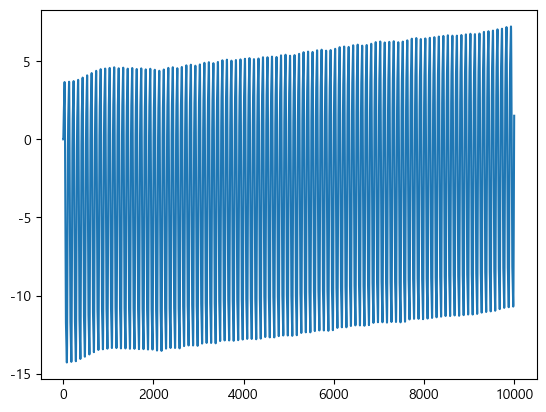

In [146]:
plt.plot(result_matrix_3[:,0])